<a href="https://www.kaggle.com/fanbyprinciple/brain-tumour-mri-data?scriptVersionId=85663754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# accompanying notebook from https://www.youtube.com/watch?v=5lgrlddp-98

# Importing modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Preparing / collecting data

Lets just choose between two classes, no_tumour and pituatory_tumour.

In [3]:
import os
path = os.listdir('../input/brain-tumor-classification-mri/Training')
classes = {'no_tumor': 0, 'pituitary_tumor':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '../input/brain-tumor-classification-mri/Training/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

np.unique(Y)

array([0, 1])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [7]:
X.shape

(1222, 200, 200)

## Visualising data

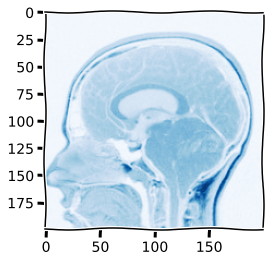

In [8]:
with plt.xkcd():
    plt.imshow(X[0], cmap='Blues')

## Prepare data

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

## Split data

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

In [11]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

## Feature scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


## Feature selection PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

(977, 40000) (245, 40000)


## Train model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [16]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [17]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

## Evaluation

In [18]:
print("training score: ", lg.score(pca_train, ytrain))
print("testing score: ", lg.score(pca_test, ytest))

training score:  1.0
testing score:  0.9714285714285714


In [19]:
print("training score: ", sv.score(pca_train, ytrain))
print("testing score: ", sv.score(pca_test, ytest))

training score:  0.9959058341862845
testing score:  0.963265306122449


## Prediction

In [20]:
pred = sv.predict(pca_test)
np.where(ytest != pred)

(array([  3,  33,  57,  60, 138, 159, 172, 220, 225]),)

In [21]:
pred[6]

0

In [22]:
ytest[6]

0

## Test model